# Project 01: Exploring the Chicago Taxi Dataset



## Due Monday, July 12 at 11:59pm


<img src="data/taxi.jpg" width=70%>



Welcome to Project 01! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is *comprehensive*, meaning that it draws upon everything we've learned this quarter so far. Second, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life".

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework.

### Instructions

**Important**: The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Remember that you may work in pairs for this assignment! If you work in a pair, you should submit one notebook to Gradescope for the both of you.

Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck. A calendar with lab hour times and locations appears on [the course webpage](http://dsc10.com).

In [1]:
# please don't change this cell, but do make sure to run it
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

import otter
import numbers
import IPython
grader = otter.Notebook()

## 1. Preparing the Data

In recent years, cities across the world have started publishing interesting and important data, providing citizen researchers with the information necessary to understand how such things as transportation, policing, and education operate in their city. You can see some of the datasets made available by the city of San Diego [here](https://data.sandiego.gov/).

In this project, we'll take a look at a massive dataset published by the city of Chicago which contains information about *every taxi ride* since 2013. The full dataset contains 194 *million* taxi trips and requires roughly 50 gigabytes of storage. To make our job a little easier, we're instead going to analyze a random sample of around 112,000 taxi trips drawn from this larger dataset.

Our first step in any analysis is to load the dataset and prepare it for exploration. The main dataset for this project is stored in `data/chicago_taxi_trips.csv`. Since this is a CSV file we can read it with `bpd.read_csv`:

In [2]:
trips_raw = bpd.read_csv('data/chicago_taxi_trips.csv')
trips_raw

,unique_key,taxi_ID,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,trip_total,payment_type,company
0,5010436ea1be6bed3abb167bcd583b5e598c72be,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-06-09 16:30:00+00:00,2013-06-09 16:44:00+00:00,0.4,8.0,14.0,17.85,4.25,22.10,Credit Card,Taxi Affiliation Services
1,58d40c82bd65f8337a7cf79c4bcff06a10f6622f,405acec2f3a156bb57c8593c02dbce47f44b63b86fcbc4...,2013-06-02 13:02:00+00:00,2013-06-02 13:18:00+00:00,31.0,6.0,8.0,10.85,2.15,13.00,Credit Card,Taxi Affiliation Services
2,bd6cd7917ad811078f8f294a02631e004ef1304a,ce28f4015e6382801a405172085edd713a9fffeb321e91...,2013-06-02 15:18:00+00:00,2013-06-02 15:37:00+00:00,0.3,33.0,7.0,13.65,3.40,17.05,Credit Card,Taxi Affiliation Services
3,876dc025833db474c149b25de1d9d39c9b735a54,c839de167830c1d8f7e1a489a1b9be2940314aba5857c6...,2013-06-02 15:38:00+00:00,2013-06-02 16:10:00+00:00,1.0,76.0,7.0,34.85,7.35,44.20,Credit Card,Blue Ribbon Taxi Association Inc.
4,c33695d66708b57df3cde919c2e831b58bee71a7,e3dfdc6273b53e7bea4294c159fb810c907ffcd2aba9ba...,2013-05-29 14:54:00+00:00,2013-05-29 15:09:00+00:00,0.0,8.0,28.0,10.45,2.05,12.50,Credit Card,Dispatch Taxi Affiliation
...,...,...,...,...,...,...,...,...,...,...,...,...
112028,d0bab20937a56fe51262cae9a87dd3006c2a451e,071d031c64f608418d27905c9ffe95bf52695615683d5f...,2019-08-31 01:59:00+00:00,2019-08-31 02:05:00+00:00,0.0,7.0,8.0,8.25,1.50,9.75,Credit Card,Taxi Affiliation Services
112029,12f56b557cbad2cea23a982aff90997147d1251b,2519839bf9f934467cc32afcc9c18454ba976c46b3934f...,2019-09-27 19:07:00+00:00,2019-09-27 19:21:00+00:00,0.0,8.0,32.0,9.50,1.50,13.00,Credit Card,Taxi Affiliation Services
112030,951f84fbe8312fa45a50e6aa377d7dbd51aa951f,5bee5f6487e84f44cf772c1e26d79f8d82e30539c71bf8...,2018-08-21 12:55:00+00:00,2018-08-21 13:01:00+00:00,0.8,8.0,32.0,6.00,1.50,8.50,Credit Card,Taxi Affiliation Services
112031,1679cf5f7ac18c6573edc87ccbafce7c6825be3a,249ef6f75a49feebb50f4bc68cf7ba703c4006498c63b6...,2019-09-12 17:23:00+00:00,2019-09-12 17:36:00+00:00,1.1,32.0,8.0,8.25,1.50,10.25,Credit Card,Chicago Carriage Cab Corp


You might notice that reading in the data took a little longer than usual. That's because this file contains 30 MB of data -- not a *huge* amount, but certainly larger than most of the datasets we've been working with so far.

Taking a quick look at the table, we see that each row represents a single taxi trip. The precise meaning of each column is provided by the [city of Chicago's open data portal](https://digital.chicago.gov/index.php/chicago-taxi-data-released/). Here are the summaries:

- **unique_key**: a unique identifier given to each trip
- **taxi_ID**: an anonymous identifier unique to each taxi. If two trips have the same taxi_ID, they shared the same taxi driver.
- **trip_start_timestamp**: a string describing the start time of the trip
- **trip_end_timestamp**: a string describing the end time of the trip
- **trip_miles**: the length of the trip in miles
- **pickup_community_area**: an integer representing the area in which the trip started
- **dropoff_community_area**: an integer representing the area in which the trip ended
- **fare**: the price of the trip in dollars, excluding tip and extra fees
- **tips**: the tip in dollars. If the customer paid in cash, the tip is not recorded, and this is zero.
- **trip_total**: the total price of the trip in dollars, including fare, tips, and extra fees.
- **payment_type**: a string describing the method used to pay for the trip. e.g., "Credit Card"
- **company**: the taxi company providing the trip

Before moving on, it's worthwhile to note that there are **serious** privacy and security concerns surrounding the publication of every taxi trip. A motivated person could in principle use this data to track the behaviors of individuals and exploit these insights for malicious purposes. As a result, the city of Chicago has thankfully taken steps to anonymize the data while preserving as much useful information as possible. For one, the precise location of the trip has been replaced by the much more vague [community area number](https://en.wikipedia.org/wiki/Community_areas_in_Chicago). The start and stop times have also been modified so that they are only accurate to within 15 minutes (although the trip duration, calculated by the difference between them, *is* accurate).

By the way, while the anonymization of data sets is a standard "best practice" in data science, it is often done improperly. A famous example of this came when the state of Massachusetts released the medical records of state employees which included every hospital visit and prescription. Given the obvious privacy concerns, the governor at the time, William Weld, assured the public that the data had been sufficiently anonymized. Latanya Sweeney, a graduate student research in computer science, [famously proved the governor's claims wrong](https://arstechnica.com/tech-policy/2009/09/your-secrets-live-online-in-databases-of-ruin/) by identifying many of the people in the data set from their zip code, birth date, and gender alone. She demonstrated how easily it was to de-anonymize the data by identifying Governor Weld's medical records -- which included diagnoses and medications -- and mailing them to his office.

Back to the data set. You might notice that the tax ID is a long string of numbers and letters than looks almost random. You might know that every taxi in the city has a unique *medallion number* printed on its side. Why not just use this number? Privacy for the taxi driver. In this data set, every taxi is assign a UUID (universally unique identifier) that is unique to it, but which has no meaning outside of the dataset.

Let's prepare our dataset. Is there a column that would work naturally as an index? Since each row is a trip, the **unique_key** column makes the most sense. We'll use it as the index.

In [3]:
trips_with_index = trips_raw.set_index('unique_key')
trips_with_index

,taxi_ID,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,trip_total,payment_type,company
unique_key,,,,,,,,,,,
5010436ea1be6bed3abb167bcd583b5e598c72be,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-06-09 16:30:00+00:00,2013-06-09 16:44:00+00:00,0.4,8.0,14.0,17.85,4.25,22.10,Credit Card,Taxi Affiliation Services
58d40c82bd65f8337a7cf79c4bcff06a10f6622f,405acec2f3a156bb57c8593c02dbce47f44b63b86fcbc4...,2013-06-02 13:02:00+00:00,2013-06-02 13:18:00+00:00,31.0,6.0,8.0,10.85,2.15,13.00,Credit Card,Taxi Affiliation Services
bd6cd7917ad811078f8f294a02631e004ef1304a,ce28f4015e6382801a405172085edd713a9fffeb321e91...,2013-06-02 15:18:00+00:00,2013-06-02 15:37:00+00:00,0.3,33.0,7.0,13.65,3.40,17.05,Credit Card,Taxi Affiliation Services
876dc025833db474c149b25de1d9d39c9b735a54,c839de167830c1d8f7e1a489a1b9be2940314aba5857c6...,2013-06-02 15:38:00+00:00,2013-06-02 16:10:00+00:00,1.0,76.0,7.0,34.85,7.35,44.20,Credit Card,Blue Ribbon Taxi Association Inc.
c33695d66708b57df3cde919c2e831b58bee71a7,e3dfdc6273b53e7bea4294c159fb810c907ffcd2aba9ba...,2013-05-29 14:54:00+00:00,2013-05-29 15:09:00+00:00,0.0,8.0,28.0,10.45,2.05,12.50,Credit Card,Dispatch Taxi Affiliation
...,...,...,...,...,...,...,...,...,...,...,...
d0bab20937a56fe51262cae9a87dd3006c2a451e,071d031c64f608418d27905c9ffe95bf52695615683d5f...,2019-08-31 01:59:00+00:00,2019-08-31 02:05:00+00:00,0.0,7.0,8.0,8.25,1.50,9.75,Credit Card,Taxi Affiliation Services
12f56b557cbad2cea23a982aff90997147d1251b,2519839bf9f934467cc32afcc9c18454ba976c46b3934f...,2019-09-27 19:07:00+00:00,2019-09-27 19:21:00+00:00,0.0,8.0,32.0,9.50,1.50,13.00,Credit Card,Taxi Affiliation Services
951f84fbe8312fa45a50e6aa377d7dbd51aa951f,5bee5f6487e84f44cf772c1e26d79f8d82e30539c71bf8...,2018-08-21 12:55:00+00:00,2018-08-21 13:01:00+00:00,0.8,8.0,32.0,6.00,1.50,8.50,Credit Card,Taxi Affiliation Services


### Working with datetimes

We'll certainly want to perform some analyses using the time that the trip started. For instance, is the number of taxi trips changing over time? The start and end time of each trip are currently stored as strings in **trip_start_timestamp** and **trip_stop_timestamp**. In particular, these strings are stored in an international standard format so that they can be written and read by different software systems without too much hassle. For instance, the string `2013-06-09 16:30:00+00:00` represents the datetime of June 9, 2013 at 4:30 PM. The timezone is not provided, but we can probably assume that it is CST (Central Standard Time). We'll check this assumption soon.

To make working with the times easier, let's extract the year, month, date, and hour from this string. We *could* do this with the string methods we've seen before, but Python actually provides an easier way. The `datetime` module, included with Python, has a function which will read a datetime string in standard format and convert it to a *datetime* object.

In [4]:
import datetime
dt = datetime.datetime.fromisoformat('2013-06-09 16:30:00+00:00')
dt

datetime.datetime(2013, 6, 9, 16, 30, tzinfo=datetime.timezone.utc)

Python has parsed the datestring into its constituent parts. To get the year from our datestring, for example, we can write:

In [5]:
dt.year

2013

To get the day, we can write:

In [6]:
dt.day

9

We can even ask which day of the week this particular date corresponds to with `.weekday()`. The result is a number; 0 corresponds to Monday, 1 corresponds to Tuesday, and so forth.

In [7]:
dt.weekday()

6

**Question 1.** Starting with `trips_with_index`, create a new table called `trips_with_start_times` which has all of the columns of the old table, plus five new columns: 

- **start_year**: the year of the trip start time as an integer. e.g., 2013.
- **start_month**: the month of the trip start time as an integer. e.g., 6
- **start_day**: the day of the month of the trip start time. e.g., 9.
- **start_weekday**: the day of the week as an integer, with Monday being 0, Tuesday being 1., etc. e.g., 6
- **start_hour**: the hour of the start time as an integer. e.g., 16.

*Note*: this question, like many in this project, requires several steps. Feel free to create new cells.

The tests for this question will look an arbitrary row of the table and make sure that you've calculated the correct `start_year`, `start_month`, etc.

```
BEGIN QUESTION
name: q1_1
```

In [8]:
# BEGIN SOLUTION NO PROMPT
def extract_year(s):
    dt = datetime.datetime.fromisoformat(s)
    return dt.year

def extract_month(s):
    dt = datetime.datetime.fromisoformat(s)
    return dt.month

def extract_day(s):
    dt = datetime.datetime.fromisoformat(s)
    return dt.day

def extract_weekday(s):
    dt = datetime.datetime.fromisoformat(s)
    return dt.weekday()

def extract_hour(s):
    dt = datetime.datetime.fromisoformat(s)
    return dt.hour
# END SOLUTION
trips_with_start_times = trips_with_index.assign( # SOLUTION
    start_year=trips_with_index.get('trip_start_timestamp').apply(extract_year), # SOLUTION NO PROMPT
    start_month=trips_with_index.get('trip_start_timestamp').apply(extract_month), # SOLUTION NO PROMPT
    start_day=trips_with_index.get('trip_start_timestamp').apply(extract_day), # SOLUTION NO PROMPT
    start_weekday=trips_with_index.get('trip_start_timestamp').apply(extract_weekday), # SOLUTION NO PROMPT
    start_hour=trips_with_index.get('trip_start_timestamp').apply(extract_hour), # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT
trips_with_start_times

,taxi_ID,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,trip_total,payment_type,company,start_year,start_month,start_day,start_weekday,start_hour
unique_key,,,,,,,,,,,,,,,,
5010436ea1be6bed3abb167bcd583b5e598c72be,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-06-09 16:30:00+00:00,2013-06-09 16:44:00+00:00,0.4,8.0,14.0,17.85,4.25,22.10,Credit Card,Taxi Affiliation Services,2013,6,9,6,16
58d40c82bd65f8337a7cf79c4bcff06a10f6622f,405acec2f3a156bb57c8593c02dbce47f44b63b86fcbc4...,2013-06-02 13:02:00+00:00,2013-06-02 13:18:00+00:00,31.0,6.0,8.0,10.85,2.15,13.00,Credit Card,Taxi Affiliation Services,2013,6,2,6,13
bd6cd7917ad811078f8f294a02631e004ef1304a,ce28f4015e6382801a405172085edd713a9fffeb321e91...,2013-06-02 15:18:00+00:00,2013-06-02 15:37:00+00:00,0.3,33.0,7.0,13.65,3.40,17.05,Credit Card,Taxi Affiliation Services,2013,6,2,6,15
876dc025833db474c149b25de1d9d39c9b735a54,c839de167830c1d8f7e1a489a1b9be2940314aba5857c6...,2013-06-02 15:38:00+00:00,2013-06-02 16:10:00+00:00,1.0,76.0,7.0,34.85,7.35,44.20,Credit Card,Blue Ribbon Taxi Association Inc.,2013,6,2,6,15
c33695d66708b57df3cde919c2e831b58bee71a7,e3dfdc6273b53e7bea4294c159fb810c907ffcd2aba9ba...,2013-05-29 14:54:00+00:00,2013-05-29 15:09:00+00:00,0.0,8.0,28.0,10.45,2.05,12.50,Credit Card,Dispatch Taxi Affiliation,2013,5,29,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0bab20937a56fe51262cae9a87dd3006c2a451e,071d031c64f608418d27905c9ffe95bf52695615683d5f...,2019-08-31 01:59:00+00:00,2019-08-31 02:05:00+00:00,0.0,7.0,8.0,8.25,1.50,9.75,Credit Card,Taxi Affiliation Services,2019,8,31,5,1
12f56b557cbad2cea23a982aff90997147d1251b,2519839bf9f934467cc32afcc9c18454ba976c46b3934f...,2019-09-27 19:07:00+00:00,2019-09-27 19:21:00+00:00,0.0,8.0,32.0,9.50,1.50,13.00,Credit Card,Taxi Affiliation Services,2019,9,27,4,19
951f84fbe8312fa45a50e6aa377d7dbd51aa951f,5bee5f6487e84f44cf772c1e26d79f8d82e30539c71bf8...,2018-08-21 12:55:00+00:00,2018-08-21 13:01:00+00:00,0.8,8.0,32.0,6.00,1.50,8.50,Credit Card,Taxi Affiliation Services,2018,8,21,1,12


In [9]:
## TEST ##
trips_with_start_times.loc['12f56b557cbad2cea23a982aff90997147d1251b', 'start_year']

2019

In [10]:
## TEST ##
trips_with_start_times.loc['12f56b557cbad2cea23a982aff90997147d1251b', 'start_month']

9

In [11]:
## TEST ##
trips_with_start_times.loc['12f56b557cbad2cea23a982aff90997147d1251b', 'start_day']

27

In [12]:
## TEST ##
trips_with_start_times.loc['12f56b557cbad2cea23a982aff90997147d1251b', 'start_weekday']

4

In [13]:
## TEST ##
trips_with_start_times.loc['12f56b557cbad2cea23a982aff90997147d1251b', 'start_hour']

19

We will also want to know the *duration* of each trip. A trip's duration is calculated by finding the difference between the trip's start and end times. Luckily, Python's `datetime` module provides a simple way of calculating the difference between two points in time. For example:

In [14]:
start = datetime.datetime.fromisoformat('2013-06-09 16:30:00+00:00')
stop = datetime.datetime.fromisoformat('2013-07-12 16:44:00+00:00')
stop - start

datetime.timedelta(days=33, seconds=840)

The result of subtracting one datetime from another is a *timedelta* object representing the length of time between the two datetimes. If we want this duration in seconds, we can use the `.total_seconds()` method:

In [15]:
(stop - start).total_seconds()

2852040.0

As another example, the below computes the total number of minutes in a standard year (also a famous lyric from the musical *Rent*).

In [16]:
datetime.timedelta(days=365).total_seconds() / 60

525600.0

**Question 2.** Starting with `trips_with_start_times`, create a new table called simply `trips` which with all of the columns of the starting table, plus an additional column named **duration** containing the duration of each trip in seconds. `trips` will be the table we use as a starting point for most of the analyses to follow.

The test for this problem will look at an arbitrary row in the table and make sure you've calculated the correct value for `duration`.

```
BEGIN QUESTION
name: q1_2
```

In [17]:
# BEGIN SOLUTION NO PROMPT
def to_datetime(s):
    return datetime.datetime.fromisoformat(s)

def extract_total_seconds(td):
    return td.total_seconds()

duration = (
    trips_with_start_times.get('trip_end_timestamp').apply(to_datetime)
    -
    trips_with_start_times.get('trip_start_timestamp').apply(to_datetime)
).apply(extract_total_seconds)
# END SOLUTION
trips = trips_with_start_times.assign(duration=duration) # SOLUTION
trips

,taxi_ID,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,trip_total,payment_type,company,start_year,start_month,start_day,start_weekday,start_hour,duration
unique_key,,,,,,,,,,,,,,,,,
5010436ea1be6bed3abb167bcd583b5e598c72be,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-06-09 16:30:00+00:00,2013-06-09 16:44:00+00:00,0.4,8.0,14.0,17.85,4.25,22.10,Credit Card,Taxi Affiliation Services,2013,6,9,6,16,840.0
58d40c82bd65f8337a7cf79c4bcff06a10f6622f,405acec2f3a156bb57c8593c02dbce47f44b63b86fcbc4...,2013-06-02 13:02:00+00:00,2013-06-02 13:18:00+00:00,31.0,6.0,8.0,10.85,2.15,13.00,Credit Card,Taxi Affiliation Services,2013,6,2,6,13,960.0
bd6cd7917ad811078f8f294a02631e004ef1304a,ce28f4015e6382801a405172085edd713a9fffeb321e91...,2013-06-02 15:18:00+00:00,2013-06-02 15:37:00+00:00,0.3,33.0,7.0,13.65,3.40,17.05,Credit Card,Taxi Affiliation Services,2013,6,2,6,15,1140.0
876dc025833db474c149b25de1d9d39c9b735a54,c839de167830c1d8f7e1a489a1b9be2940314aba5857c6...,2013-06-02 15:38:00+00:00,2013-06-02 16:10:00+00:00,1.0,76.0,7.0,34.85,7.35,44.20,Credit Card,Blue Ribbon Taxi Association Inc.,2013,6,2,6,15,1920.0
c33695d66708b57df3cde919c2e831b58bee71a7,e3dfdc6273b53e7bea4294c159fb810c907ffcd2aba9ba...,2013-05-29 14:54:00+00:00,2013-05-29 15:09:00+00:00,0.0,8.0,28.0,10.45,2.05,12.50,Credit Card,Dispatch Taxi Affiliation,2013,5,29,2,14,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0bab20937a56fe51262cae9a87dd3006c2a451e,071d031c64f608418d27905c9ffe95bf52695615683d5f...,2019-08-31 01:59:00+00:00,2019-08-31 02:05:00+00:00,0.0,7.0,8.0,8.25,1.50,9.75,Credit Card,Taxi Affiliation Services,2019,8,31,5,1,360.0
12f56b557cbad2cea23a982aff90997147d1251b,2519839bf9f934467cc32afcc9c18454ba976c46b3934f...,2019-09-27 19:07:00+00:00,2019-09-27 19:21:00+00:00,0.0,8.0,32.0,9.50,1.50,13.00,Credit Card,Taxi Affiliation Services,2019,9,27,4,19,840.0
951f84fbe8312fa45a50e6aa377d7dbd51aa951f,5bee5f6487e84f44cf772c1e26d79f8d82e30539c71bf8...,2018-08-21 12:55:00+00:00,2018-08-21 13:01:00+00:00,0.8,8.0,32.0,6.00,1.50,8.50,Credit Card,Taxi Affiliation Services,2018,8,21,1,12,360.0


In [18]:
## TEST ##
trips.loc['1679cf5f7ac18c6573edc87ccbafce7c6825be3a', 'duration']

780.0

### Check your work!

Before moving on, it is absolutely crucial that you have the right information in your `trips` table, since we'll be making frequent use of it in the rest of the project. The test below will make sure (as best as it is able) that you've done everything correctly so far. If it fails make sure your table has:

- 17 columns
- 113,033 rows
- the unique key as the index
- the correct column names

If you've verified that the table has the right shape and column names, make sure your converted times are correct. Take an arbitrary row, like row 3, and calculate the duration by hand. Compare this to what is in your table.

```
BEGIN QUESTION
name: q1_check
```

In [19]:
## TEST ##
trips.shape

(112033, 17)

In [20]:
## TEST ##
'5010436ea1be6bed3abb167bcd583b5e598c72be' in trips.index

True

In [21]:
## TEST ##
'::'.join(sorted(trips.columns))

'company::dropoff_community_area::duration::fare::payment_type::pickup_community_area::start_day::start_hour::start_month::start_weekday::start_year::taxi_ID::tips::trip_end_timestamp::trip_miles::trip_start_timestamp::trip_total'

## 2. Exploratory Data Analysis

Now let's do some rudimentary exploration of this large dataset in order to find some interesting trends worthy of further investigation. Exploratory data analysis often involves a lot of queries, grouping (sometimes even double grouping!), and visualization. Chapter 02 of the [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html) might come in handy.

You should use the `trips` table as a starting point for the problems below.

**Note**: There are many "conceptual" questions in this section that will ask you to look at a plot and determine the "most likely" reason for seeing a certain trend. To answer these questions, you can perform additional analyses or even use Google to do additional research, though it is usually sufficient to just look at the plot and use your experience with how taxis operate.

Let's start by trying to understand the distribution of trip distances. We can use a histogram for this.

<AxesSubplot:ylabel='Frequency'>

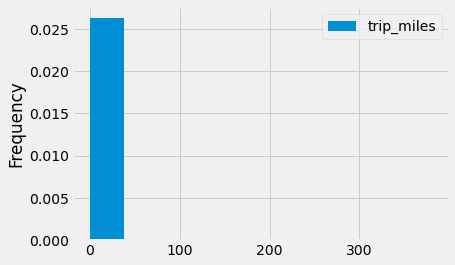

In [22]:
trips.plot(kind='hist', y='trip_miles', density=True)

Well that's not very useful...

**Question 1.** (Multiple choice) Why does the plot look like this? Assign the number of your answer to the variable below.

1. All of the trips are the same distance.
2. There is a bug in babypandas.
3. There is are *outlier* trips which are much longer than the rest of the trips, causing most of the data to be placed in the first bin.
4. What do you mean? My plot looks fine.

```
BEGIN QUESTION
name: q2_1
```

In [23]:
mc_histogram_weirdness = 3 # SOLUTION

In [24]:
## TEST ##
mc_histogram_weirdness in {1,2,3,4}

True

In [25]:
## HIDDEN TEST ##
mc_histogram_weirdness

3

**Question 2.** What is the length of the longest trip in miles?

```
BEGIN QUESTION
name: q2_2
```

In [26]:
longest_trip_length = trips.get('trip_miles').max() # SOLUTION
longest_trip_length

380.2

In [27]:
## TEST ##
import numbers
isinstance(longest_trip_length, numbers.Real)

True

In [28]:
## HIDDEN TEST ##
longest_trip_length

380.2

**Question 3.** What was the trip ID of the longest trip in miles?

```
BEGIN QUESTION
name: q2_3
```

In [29]:
longest_trip_id = trips.sort_values(by='trip_miles').index[-1] # SOLUTION
longest_trip_id

'd36bc8efa0ccca7fbf3405a31254c28601cb446a'

In [30]:
## TEST ##
isinstance(longest_trip_id, str)

True

In [31]:
## HIDDEN TEST ##
longest_trip_id

'd36bc8efa0ccca7fbf3405a31254c28601cb446a'

**Question 4.** That was probably an expensive taxi ride! What was the fare of that trip? *Note*: it might be lower than you expect...

```
BEGIN QUESTION
name: q2_4
```

In [32]:
longest_trip_fare = trips.get('fare').loc['d36bc8efa0ccca7fbf3405a31254c28601cb446a'] # SOLUTION
longest_trip_fare

37.5

In [33]:
## TEST ##
import numbers
isinstance(longest_trip_fare, numbers.Real)

True

In [34]:
## HIDDEN TEST ##
longest_trip_fare

37.5

That can't be right! What we're seeing is that real-world datasets are *messy*. They contain errors. As a result, sensitive statistics, like the maximum or the minimum, might not be reliable. Luckily, aggregated statistics like the median are usually pretty good.

**Question 5.** Write a function named `median_fare(distance)` which takes in a certain distance and returns the median fare of all trips within 3 miles (inclusive) of that distance.

```
BEGIN QUESTION
name: q2_6
```

In [35]:
def median_fare(distance):
    # BEGIN SOLUTION
    return trips[
        (trips.get('trip_miles') >= (distance - 3))
        &
        (trips.get('trip_miles') <= (distance + 3))
    ].get('fare').median()
    # END SOLUTION

In [36]:
## TEST ##
callable(median_fare)

True

In [37]:
## TEST ##
import numbers
isinstance(median_fare(20), numbers.Real)

True

In [38]:
## HIDDEN TEST ##
median_fare(20)

44.25

For the present purposes of visualizing the distribution of trip lengths, the presence of outliers can be addressed by excluding the outliers from the data used to compute the histogram.

**Question 6.** (Multiple choice) Plot a histogram of the distribution of trip lengths including only those trips whose distance is less than 30 miles in order to exclude outliers. Use bins starting at zero miles and going up to (and including) 30 miles, with a bin width of 1 mile.

Use your histogram to answer the following multiple choice question: As trip length increases, the number of trips with that length appears to decrease until there is a second, small peak. At what trip length does this second, small peak occur?

1. 18 miles
2. 17 miles
3. 16 miles
4. 10 miles

```
BEGIN QUESTION
name: q2_6
```

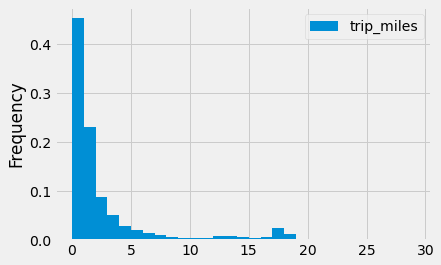

In [39]:
# make your plot here
# BEGIN SOLUTION
(
    trips[trips.get('trip_miles') < 30]
    .plot(kind='hist', y='trip_miles', bins=np.arange(0, 30, 1), density=True) 
)
# END SOLUTION
mc_location_of_second_peak = 2 # SOLUTION

In [40]:
## HIDDEN TEST ##
mc_location_of_second_peak

2

The existence of this second peak is interesting. Where are these trips going?

**Question 7.** Using the histogram above, choose a range of trip lengths that contains the "second peak". Then find the most common dropoff location of these trips with lengths inside this range. Your answer should be in the form of an integer representing a community area.

```
BEGIN QUESTION
name: q2_7
```

In [41]:
second_peak_dropoff_location = trips[ # SOLUTION
    (trips.get('trip_miles') < 30) # SOLUTION NO PROMPT
    & # SOLUTION NO PROMPT
    (trips.get('trip_miles') > 20) # SOLUTION NO PROMPT
].groupby('dropoff_community_area').count().sort_values(by='taxi_ID').index[-1] # SOLUTION NO PROMPT

In [42]:
## TEST ##
second_peak_dropoff_location > 0

True

In [43]:
## HIDDEN TEST ##
int(second_peak_dropoff_location)

76

**Question 8.** Chicago is divided into numbered "community areas". The file `data/community_areas.csv` contains each community area number, the name of the community area, and its population. Using this data, what is the name of the most common destination community area you found above? Your answer should be a string as it appears in `community_areas.csv`.

```
BEGIN QUESTION
name: q2_8
```

In [44]:
# BEGIN SOLUTION
bpd.read_csv('data/community_areas.csv').set_index('Area #').get('Area Name').values

second_peak_dropoff_location_name = bpd.read_csv('data/community_areas.csv').set_index('Area #').get('Area Name').loc[76] # SOLUTION
second_peak_dropoff_location_name
# END SOLUTION

"O'Hare"

In [45]:
## TEST ##
isinstance(second_peak_dropoff_location_name, str)

True

In [46]:
## HIDDEN TEST ##
second_peak_dropoff_location_name

"O'Hare"

With the rise of ridesharing services like Uber and Lyft, we expect the number of taxi rides to be decreasing over time. Does the data support this hypothesis? We can check with another plot.

**Question 9.** Plot the total number of trips per per month as a line graph. Use your graph to answer the following question: during which year was the peak number of trips reached?

*Hint*: you might need a groupby with multiple columns. Use the trip start time to place a trip within a month.

```
BEGIN QUESTION
name: q2_9
```

/nix/store/7lmwfp7imjkxb8aw7yy5ayjiswnsdxna-python3.8-pandas-1.1.1/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


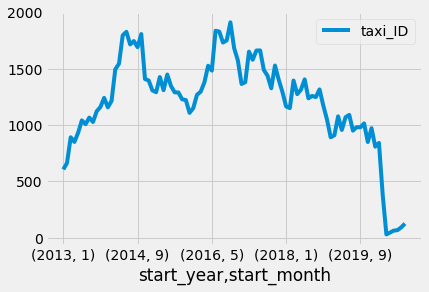

In [47]:
# make your plot here
trips.groupby(['start_year', 'start_month']).count().plot(kind='line', y='taxi_ID') # SOLUTION
year_containing_peak_trips = 2016 # SOLUTION

In [48]:
## TEST ##
isinstance(year_containing_peak_trips, int)

True

In [49]:
## HIDDEN TEST ##
year_containing_peak_trips

2016

It is interesting to think about what might have caused the peak in taxi rides. There might have been something going on in the city of Chicago during that point in time. Also notice the big drop off at the end of the plot. I wonder what caused that...

You might know that Chicago is famous for its St. Patrick's Day celebrations, during which the river is dyed green. We might expect the number of taxi trips to be higher than usual every St. Patrick's day.

<img src="data/green_river.jpg" width=50%>

**Question 10.** In 2019, Chicago's St. Patrick's day parade was held on March 16. As a proportion, what was the ratio of the number of taxi trips on March 16, 2019 to the number of taxi trips on a median day in 2019? For example, if there were 150 trips on March 16, and 100 trips on the median day, your answer would be 1.5.

```
BEGIN QUESTION
name: q2_10
```

In [50]:
# BEGIN SOLUTION NO PROMPT
trips_on_3_16_2019 = trips[
    (trips.get('start_year') == 2019)
    &
    (trips.get('start_month') == 3)
    &
    (trips.get('start_day') == 16)
].shape[0]

trips_on_median_day_of_2019 = (
    trips[trips.get('start_year') == 2019]
    .groupby(['start_month', 'start_day']).count()
).get('taxi_ID').median()
# END SOLUTION
st_patricks_ratio = trips_on_3_16_2019 / trips_on_median_day_of_2019 # SOLUTION
st_patricks_ratio

1.4375

In [51]:
## TEST ##
import numbers
isinstance(st_patricks_ratio, numbers.Real)

True

In [52]:
## HIDDEN TEST ##
st_patricks_ratio

1.4375

**Question 11.** How does trip frequency depend on the time of the day? Plot a bar chart with the 24 hours of the day on the x-axis and the number of trips in that hour on the y-axis. Use that plot to answer the following question: which hour has the greatest number of trips, overall? Use a trip's start time to place it within an hour.

```
BEGIN QUESTION
name: q2_11
```

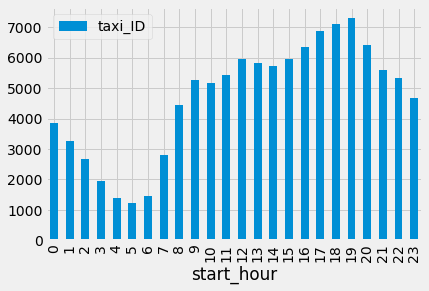

In [53]:
# make your plot here
trips.groupby('start_hour').count().plot(kind='bar', y='taxi_ID') # SOLUTION
most_popular_hour = 19 # SOLUTION

In [54]:
## TEST ##
isinstance(most_popular_hour, int)

True

In [55]:
## HIDDEN TEST ##
most_popular_hour

19

Note that we said before that we can probably assume that the dataset's times are stated in CST. The plot above validates this assumption, since we can see that there is a dip in the number of trips in the early morning hours, and that trips peak in the late afternoon/early evening, as we'd expect.

**Question 12.** Out of the community areas which appear as the dropoff point at least 100 times, which area has the greatest median trip fare?

```
BEGIN QUESTION
name: q2_12
```

In [56]:
# BEGIN SOLUTION NO PROMPT
median_fares = trips.groupby('dropoff_community_area').median()
# END SOLUTION
area_with_greatest_median_fare = ( # SOLUTION
# BEGIN SOLUTION NO PROMPT
    median_fares[
        trips.groupby('dropoff_community_area').count().get('taxi_ID') > 100
    ].sort_values(by='fare').index[-1]
)
# END SOLUTION

In [57]:
## TEST ##
area_with_greatest_median_fare > 0

True

In [58]:
## HIDDEN TEST ##
int(area_with_greatest_median_fare)

76

**Question 13.** Create a new Series called `trips_per_capita` which has the number of trips starting in each community area per person who lives there. You can use `data/community_areas.csv` to find the population of each area. Your series should have as its index the community area number.

```
BEGIN QUESTION
name: q2_13
```

In [59]:
# BEGIN SOLUTION NO PROMPT
populations = bpd.read_csv('data/community_areas.csv').set_index('Area #')
with_population = trips.groupby('pickup_community_area').count().merge(populations, left_index=True, right_index=True)
# END SOLUTION
trips_per_capita = with_population.get('taxi_ID') / with_population.get('2017 Population') # SOLUTION
trips_per_capita

1     0.008754
2     0.006075
3     0.028996
4     0.012609
5     0.016569
        ...   
72    0.000432
73    0.000801
75    0.000491
76    0.509089
77    0.020584
Length: 75, dtype: float64

In [60]:
## TEST ##
isinstance(trips_per_capita, bpd.Series)

True

In [61]:
## TEST ##
len(trips_per_capita)

75

In [62]:
## HIDDEN TEST ##
np.isclose(trips_per_capita.loc[72], .000432, atol=1e-4)

True

In [63]:
## HIDDEN TEST ##
np.isclose(trips_per_capita.loc[50], .0015121729925903524, atol=1e-4)

True

Here are the top 10 community areas by trips per capita:

<AxesSubplot:>

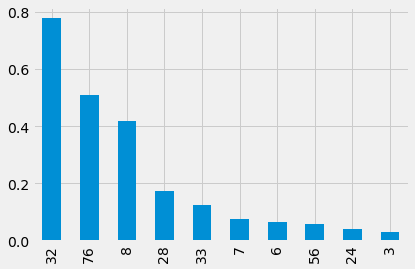

In [64]:
trips_per_capita.sort_values(ascending=False).take(range(10)).plot(kind='bar')

**Question 14.** Create a bar chart counting the number of trips paid by each payment type. Use your plot to answer: Which payment type is most popular?

1. Credit Card
2. Mobile
3. Cash
4. Dispute
5. No Charge
6. Pcard
7. Prcard
8. Split
9. Unknown

```
BEGIN QUESTION
name: q2_14
```

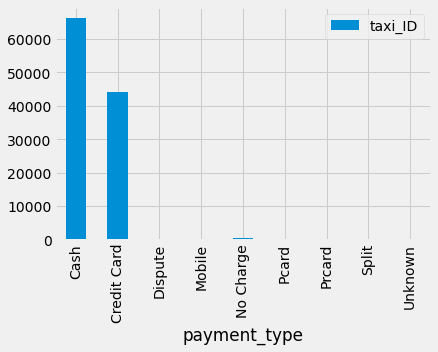

In [65]:
# make your plot here
trips.groupby('payment_type').count().plot(kind='bar', y='taxi_ID') # SOLUTION
mc_most_popular_payment = 3 # SOLUTION

In [66]:
## TEST ##
isinstance(mc_most_popular_payment, int)

True

In [67]:
## HIDDEN TEST ##
mc_most_popular_payment

3

Because this dataset contains information about the price of each trip, we can use it to ask interesting questions about tipping behavior. We can also use it to investigate common "scams" that taxi operators might use to trick customers into paying more than they need to.

Let's start with tipping. How well do people tip? Remember that the tip is not recorded if the passenger pays with cash, so we'll restrict our analysis to payment by credit card. We also are interested not in the tip in dollars, but in the tip as a proportion of the fare. The "rule of thumb" is to tip 15% of the fare -- is this what is most commonly done?

*Note*: a proportion is a decimal number. For example, if a passenger tips 1 dollar on a fare of 5 dollars, the proportion is 1/5 = 0.2. Note that it is indeed possible to have a tip proportion *over* 1, for instance, if a passenger tips 10 dollars on a fare of 5 dollars.

**Question 15.** Calculate the median tip given by people who pay by credit card *as a proportion of their fare*.

```
BEGIN QUESTION
name: q2_15
```

In [68]:
# BEGIN SOLUTION NO PROMPT
trips_paid_by_cc = trips[trips.get('payment_type') == 'Credit Card']
trips_paid_by_cc_with_tip_proportion = trips_paid_by_cc.assign(
    proportion=(trips_paid_by_cc.get('tips') / trips_paid_by_cc.get('fare'))
)
# END SOLUTION
median_tip_proportion = trips_paid_by_cc_with_tip_proportion.get('proportion').median() # SOLUTION
median_tip_proportion

0.2247191011235955

In [69]:
## TEST ##
import numbers
isinstance(median_tip_proportion, numbers.Real)

True

In [70]:
## TEST ##
0 < median_tip_proportion < 1

True

In [71]:
## HIDDEN TEST ##
np.isclose(median_tip_proportion, 0.2247191011235955, atol=1e-5)

True

Is tipping behavior dependant on the fare? For instance, are people more likely to tip a higher percentage of the fare when the fare is low? Let's see.

**Question 16.** (Multiple choice) Make a scatter plot with the fare on the x-axis and the tip proportion on the y-axis using data only from those who paid by credit card. Because of outliers, plot only the data where the tip proportion is less than 1 and the fare is less than 60 dollars.

Use your plot to answer the following question. You should notice several interesting curves which start at high proportions and decrease as the fare increases. Which of the below explanations below is most likely the reason for these curves?

1. There is an error in the data.
2. Many people calculate their tip as a percentage of the fare, and as the fare increases they decrease the percentage used in their calculation.
3. Many people tend to tip in even dollar amounts, like \\$1, \\$2, etc., regardless of the fare.
4. The number of trips decreases as the fare increases.

*Tip*: to make it easier to see trends in your plot, use `figsize=(10, 7)` as a keyword argument to `.plot()` in order to increase its size. Use `alpha=.1` to make the scatter points translucent; this allows you to recognize areas where points are densely clustered on top of one another.



```
BEGIN QUESTION
name: q2_16
```

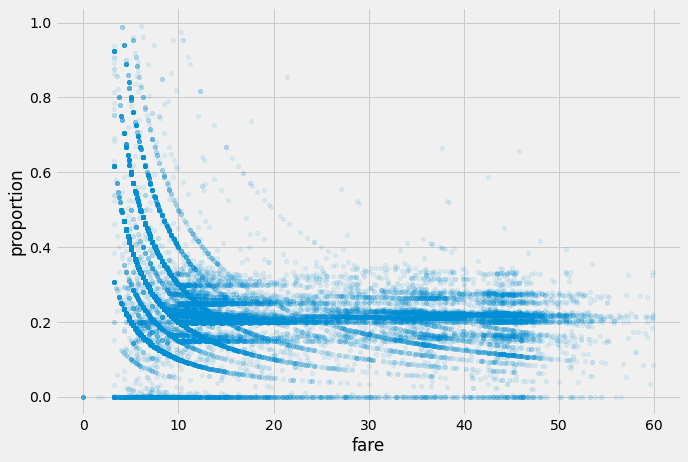

In [72]:
# make your plot here
# BEGIN SOLUTION
trips_paid_by_cc_with_tip_proportion[
    (trips_paid_by_cc_with_tip_proportion.get('fare') < 60)
    &
    (trips_paid_by_cc_with_tip_proportion.get('proportion') < 1)
].plot(kind='scatter', x='fare', y='proportion', figsize=(10, 7), alpha=.1)
# END SOLUTION
mc_reason_for_curves = 3 # SOLUTION

In [73]:
## TEST ##
mc_reason_for_curves in {1, 2, 3, 4}

True

In [74]:
## HIDDEN TEST ##
mc_reason_for_curves

3

**Question 17.** You might also have noticed that there is an invisible vertical "wall" in your plot, to the left of which there are very few trips. This wall occurs at a fare around \\$3. What is the most likely meaning of this "wall"?

1. There is an error in the data and every fare has had \\$3 dollars added to it.
2. There is a "base price" to each fare of around \\$3, meaning that a trip of zero miles taking zero seconds would cost \$$3.
3. This occurs because people who pay by credit card never took trips this short/cheap.

```
BEGIN QUESTION
name: q2_17
```

In [75]:
mc_reason_for_wall = 2 # SOLUTION

In [76]:
## TEST ##
mc_reason_for_wall in {1, 2, 3}

True

In [77]:
## HIDDEN TEST ##
mc_reason_for_wall

2

Now let's take a look at the fares. A trip's fare should increase with the trip distance. Let's plot the fare as a function of length in miles to see if we can spot a pattern.

**Question 18.** (Multiple choice) Make a scatter plot where the x-axis contains the length of the trip in miles and the y-axis contains the fare. To limit the effect of outliers, only include trips which are shorter than 40 miles long and whose fare is less than 60 dollars. Use `alpha=.01` and `figsize=(10,10)` in `.plot()` to make your plot clearer.

Use your plot to answer the following question: you should notice dense clusters of trips whose distance is between 15 and 20 miles. What is the most likely explanation for these clusters?

1. These are trips to Chicago O'Hare airport, which is a popular destination for taxi rides.
2. Most taxis used a brand of taxi meters which cannot record distances over 20 miles, so all trips which are longer than 20 miles had their distances truncated to 20.
3. Taxi drivers are not allowed to take trips over 20 miles long even though such trips pay more, so they lie about the trip distance when reporting their activity.

```
BEGIN QUESTION
name: q2_18
```

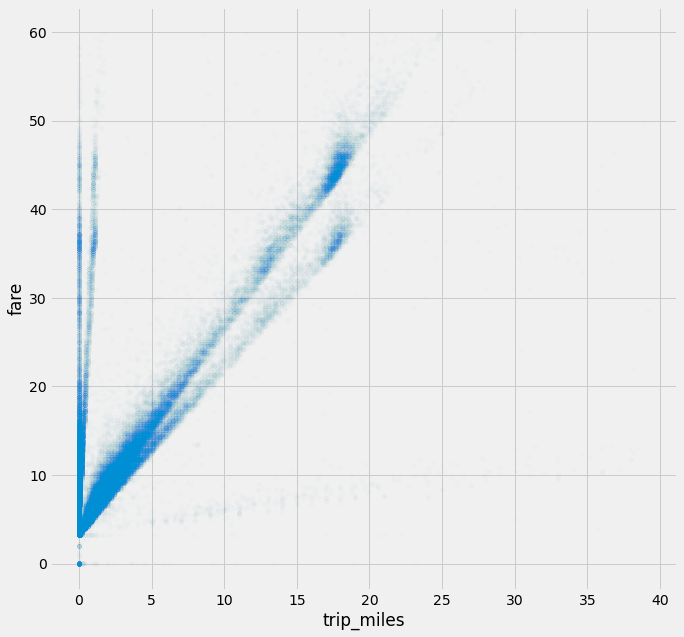

In [78]:
# make your plot here
# BEGIN SOLUTION
trips[
    (trips.get('trip_miles') < 40)
    &
    (trips.get('fare') < 60)
].plot(kind='scatter', x='trip_miles', y='fare', alpha=.01, figsize=(10,10))
# END SOLUTION
mc_reason_for_bubbles = 1 # SOLUTION

In [79]:
## TEST ##
mc_reason_for_bubbles in {1, 2, 3}

True

In [80]:
## HIDDEN TEST ##
mc_reason_for_bubbles

1

You should also see several thin, long line-like clusters of points emanating from the bottom left with different slopes. That is interesting... why do we see such distinct clusters?

In Chicago (and many other cities), taxi fares are determined by the city, and not by the individual taxi driver or taxi company. The taxi fare is determined entirely by the distance of the trip in miles and the length of the trip in seconds. Chicago's fare rates (current as of 2016/1/1) can be found [here](https://www.chicago.gov/city/en/depts/bacp/supp_info/2012_passenger_information.html), but here's the summary:

- Every trip is charged a flat \\$3.25 "base fare".
- Each additional whole mile costs \\$2.25.
- Every additional 36 seconds costs \\$0.20.

Trips to the suburbs have their fare calculated by using the original formula to calculate the "meter fare"; this fare is then multiplied by 1.5 to obtain the final fare.

There are other fees for additional passengers, leaving the airport, etc., but these are not included in the fare. We'll investigate the extra fees in a moment.

It is also useful to know that there was a fare increase in 2016. Before this, the fares were calculated using the following formula:

- Every trip is charged a flat fee of \\$2.25.
- Each additional whole mile costs \\$1.80.
- Every additional 30 seconds costs \\$0.20.

To simplify our analysis, let's select only trips from 2016 and after, since they are calculated using the same fare rates.

**Question 19.** (Multiple choice) Repeat the scatter plot you made at the end of the previous section which compared the fare to the trip distance, this time including only the trips from 2016 on. You should see that of the main clusters has disappeared -- apparently, that cluster contained trips from before 2016, which were calculated at the previous fare rate.

Use your plot to answer the following question: In addition to the "main" cluster whose slope is around 2.25, you should see two very thin clusters with steep slopes. Which of the following explanations for the existence of these clusters is most likely?

1. Trips to the suburbs have their fare calculated by using the original formula to calculate the "meter fare"; this fare is then multiplied by 1.5 to obtain the final fare.
2. These are trips during high-demand times, like baseball games, where traffic is barely moving. The fare is high even though the distance is small because the duration is large.
3. Companies are not using the city-mandated fare rates, and are instead charging much more for every mile traveled.
4. Some taxis are not reporting or consistently misreporting distance traveled, while still charging what appears to be the correct fare.

*Hint*: Notice that these steep clusters also have the "dense bubble" of trips at around 40 to 50 dollars in fare.

```
BEGIN QUESTION
name: q2_19
```

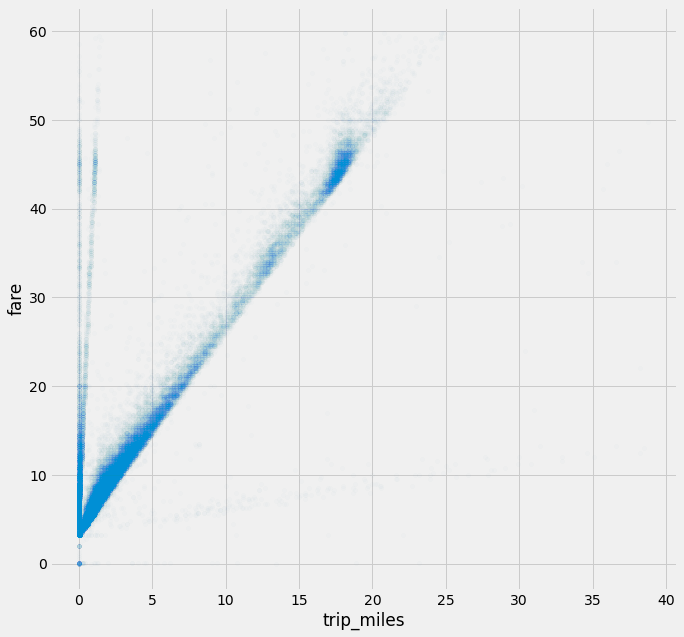

In [81]:
# make your plot here
# BEGIN SOLUTION
trips[
    (trips.get('trip_miles') < 40)
    &
    (trips.get('fare') < 60)
    &
    (trips.get('start_year') >= 2016)
].plot(kind='scatter', x='trip_miles', y='fare', alpha=.01, figsize=(10,10))
# END SOLUTION
mc_likely_explanation = 4 # SOLUTION

In [82]:
## TEST ##
mc_likely_explanation in {1, 2, 3, 4}

True

In [83]:
## HIDDEN TEST ##
mc_likely_explanation

4

## 3. Investigating Scams

Taxi companies have a reputation -- deserved or not -- as being a little dishonest from time to time. We know that there is actually very little room for taxis to inflate the fare of a taxi ride, since the rate is determined by the city and is easily audited. On the other hand, taxi drivers can add miscellaneous extra *fees* to the taxi trip in order to increase its overall price. Some of these fees are permissible -- for instance, there is a charge for each additional passenger. Since it is difficult for the city to verify that there were, indeed, additional passengers in the taxi, it is easier for the taxi operator to go unnoticed while adding spurious fees.

Here are the extra fees that are permitted by the city:

- First additional passenger: \\$1.00
- Each additional passenger after first passenger: \\$0.50 
- Vomit Clean-up Fee: \\$50.00
- Illinois Airport Departure Tax: \\$4.00

The airport departure tax is only allowed when *leaving* the airport, and it is not charged per passenger.

Let's start by extracting the fees. Remember that the `fare` column contains the fare, `tips` contains the tips, and `trip_total` contains the total price: the fare plus the tips plus fees.

**Question 1.** Starting with `trips`, create a new table called `trips_with_fees` which has the same columns as `trips`, but with a new column called `fees` containing the total amount in fees for each trip.

```
BEGIN QUESTION
name: q3_1
```

In [84]:
fees = trips.get('trip_total') - (trips.get('fare') + trips.get('tips')) # SOLUTION NO PROMPT
trips_with_fees = trips.assign(fees=fees) # SOLUTION
trips_with_fees

,taxi_ID,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,trip_total,payment_type,company,start_year,start_month,start_day,start_weekday,start_hour,duration,fees
unique_key,,,,,,,,,,,,,,,,,,
5010436ea1be6bed3abb167bcd583b5e598c72be,341cead8979074196f3231099ef811c4e905d7031dd6d7...,2013-06-09 16:30:00+00:00,2013-06-09 16:44:00+00:00,0.4,8.0,14.0,17.85,4.25,22.10,Credit Card,Taxi Affiliation Services,2013,6,9,6,16,840.0,0.0
58d40c82bd65f8337a7cf79c4bcff06a10f6622f,405acec2f3a156bb57c8593c02dbce47f44b63b86fcbc4...,2013-06-02 13:02:00+00:00,2013-06-02 13:18:00+00:00,31.0,6.0,8.0,10.85,2.15,13.00,Credit Card,Taxi Affiliation Services,2013,6,2,6,13,960.0,0.0
bd6cd7917ad811078f8f294a02631e004ef1304a,ce28f4015e6382801a405172085edd713a9fffeb321e91...,2013-06-02 15:18:00+00:00,2013-06-02 15:37:00+00:00,0.3,33.0,7.0,13.65,3.40,17.05,Credit Card,Taxi Affiliation Services,2013,6,2,6,15,1140.0,0.0
876dc025833db474c149b25de1d9d39c9b735a54,c839de167830c1d8f7e1a489a1b9be2940314aba5857c6...,2013-06-02 15:38:00+00:00,2013-06-02 16:10:00+00:00,1.0,76.0,7.0,34.85,7.35,44.20,Credit Card,Blue Ribbon Taxi Association Inc.,2013,6,2,6,15,1920.0,2.0
c33695d66708b57df3cde919c2e831b58bee71a7,e3dfdc6273b53e7bea4294c159fb810c907ffcd2aba9ba...,2013-05-29 14:54:00+00:00,2013-05-29 15:09:00+00:00,0.0,8.0,28.0,10.45,2.05,12.50,Credit Card,Dispatch Taxi Affiliation,2013,5,29,2,14,900.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d0bab20937a56fe51262cae9a87dd3006c2a451e,071d031c64f608418d27905c9ffe95bf52695615683d5f...,2019-08-31 01:59:00+00:00,2019-08-31 02:05:00+00:00,0.0,7.0,8.0,8.25,1.50,9.75,Credit Card,Taxi Affiliation Services,2019,8,31,5,1,360.0,0.0
12f56b557cbad2cea23a982aff90997147d1251b,2519839bf9f934467cc32afcc9c18454ba976c46b3934f...,2019-09-27 19:07:00+00:00,2019-09-27 19:21:00+00:00,0.0,8.0,32.0,9.50,1.50,13.00,Credit Card,Taxi Affiliation Services,2019,9,27,4,19,840.0,2.0
951f84fbe8312fa45a50e6aa377d7dbd51aa951f,5bee5f6487e84f44cf772c1e26d79f8d82e30539c71bf8...,2018-08-21 12:55:00+00:00,2018-08-21 13:01:00+00:00,0.8,8.0,32.0,6.00,1.50,8.50,Credit Card,Taxi Affiliation Services,2018,8,21,1,12,360.0,1.0


In [85]:
## TEST ##
trips_with_fees.get('fees').sum()

99156.42

In [86]:
## TEST ##
trips_with_fees.loc['00b8ef5ed124bcf726597eda5132d746ca5add8b', 'fees']

0.0

In [87]:
## TEST ##
trips_with_fees.loc['1679cf5f7ac18c6573edc87ccbafce7c6825be3a', 'fees']

0.5

**Question 2.** We'll visualize the distribution of fees using a histogram. Create an array `bins` which defines a set of bins starting at 0 dollars and increasing to 6 dollars (inclusive) with bin widths of \\$0.50.

```
BEGIN QUESTION
name: q3_2
```

In [88]:
bins = np.arange(0, 6.01, .50) # SOLUTION
bins

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ])

In [89]:
## TEST ##
isinstance(bins, np.ndarray)

True

In [90]:
## HIDDEN TEST ##
len(bins)

13

In [91]:
## HIDDEN TEST ##
np.isclose(bins[3], 1.5, atol=1e-6)

True

In [92]:
## HIDDEN TEST ##
np.isclose(bins[-1], 6, atol=1e-6)

True

Here is the distribution of fees:

<AxesSubplot:ylabel='Frequency'>

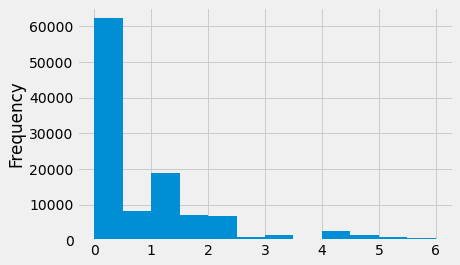

In [93]:
trips_with_fees.get('fees').plot(kind='hist', bins=bins)

Take a close look at this histogram. Given what we know about how the fees are calculated, there is something strange about this distribution. Can you tell what it is? Run the cell below to see the answer.

In [94]:
# run this cell to see the answer
IPython.display.Markdown(open('data/reveal-01.md').read())

Notice how the bin from 50 cents to one dollar is non-empty. According to the rules for calculating fees, it should not be possible for there to be a fee of this amount. The smallest possible non-zero fee is one dollar for the first additional passenger. If there are three passengers, the fee would be \\$1.50.

What is this fee? If we Google "Chicago taxi 50 cent fee", we'll find several articles, such as ["City Hall trying to get cabbies to refund illegal 50-cent 'technology fee'"](https://www.chicagotribune.com/politics/ct-chicago-refund-50-cent-fee-tech-cab-ride-20160623-story.html) from June 24, 2016. Apparently, cab drivers were illegally charging a 50 cent fee to customers who paid via credit card. Whether or not this is unethical is debatable, since cab drivers can lose a significant portion of their fare due to processing fees imposed by the credit card company.

Is this what we are seeing in the data set?

**Question 3.** Out of trips where a 50 cent fee is being charged, what percentage of trips are paid using credit card? In this question and those that follow, represent percentages using numbers between 0 and 1.

```
BEGIN QUESTION
name: q3_3
```

In [95]:
# BEGIN SOLUTION NO PROMPT
n = trips_with_fees[
    np.isclose(trips_with_fees.get('fees'), .5)
    &
    (trips_with_fees.get('payment_type') == 'Credit Card')
].shape[0]
d = trips_with_fees[
    np.isclose(trips_with_fees.get('fees'), .5)
].shape[0]
# END SOLUTION
percentage_paid_with_cc = n / d # SOLUTION
percentage_paid_with_cc

0.9594611930724823

In [96]:
## TEST ##
import numbers
isinstance(percentage_paid_with_cc, numbers.Real)

True

In [97]:
## TEST ##
0 < percentage_paid_with_cc < 1

True

In [98]:
## HIDDEN TEST ##
.95 < percentage_paid_with_cc < .96

True

It looks like the trips where a 50 cent fee is being assessed are overwhelmingly paid by credit card. Since cash is actually the most popular payment method overall, it seems very likely that this charge is due to a credit card fee.

It is actually unclear whether the fee is currently legal or illegal. The article briefly mentions that an effort to make the fee legal passed city council in March 2016, and some [taxi companies](https://yellowcabchicago.com/rates/) include a "technology fee" in their rates. However, the city of Chicago's own website does not list a tech fee. Moreover, not all drivers appear to be charging the fee. If they were, then all of the trips paid by credit card would have at least a 50 cent fee, but this isn't what we find, as the next problem shows.

**Question 4.** Out of the trips in 2019 which were paid by credit card, what is the percentage that did not charge any fee whatsoever?

```
BEGIN QUESTION
name: q3_4
```

In [99]:
# BEGIN SOLUTION NO PROMPT
numerator = trips_with_fees[
    (trips_with_fees.get('fees') == 0)
    &
    (trips_with_fees.get('payment_type') == 'Credit Card')
    &
    (trips_with_fees.get('start_year') == 2019)
].shape[0]

denominator = trips_with_fees[
    (trips_with_fees.get('payment_type') == 'Credit Card')
    &
    (trips_with_fees.get('start_year') == 2019)
].shape[0]
# END SOLUTION
percentage_charged_no_fee = numerator / denominator # SOLUTION
percentage_charged_no_fee

0.27945107823917303

In [100]:
## TEST ##
import numbers
isinstance(percentage_charged_no_fee, numbers.Real)

True

In [101]:
## TEST ##
0 < percentage_charged_no_fee < 1

True

In [102]:
## HIDDEN TEST ##
.27 < percentage_charged_no_fee < .285

True

Let's move on to another, more nefarious scam. Recall that the allowable fees include a \\$4 fee for *leaving* the airport. Notably, it is illegal to charge the fee for trips going *to* the airport.

**Question 5.** What proportion of trips going to O'Hare airport (community area 76) were charged at least \\$4 in fees?

```
BEGIN QUESTION
name: q3_5
```

In [103]:
# BEGIN SOLUTION NO PROMPT
n = trips_with_fees[
    (trips_with_fees.get('dropoff_community_area') == 76)
    &
    (trips_with_fees.get('fees') >= 4)
].shape[0]

d = trips_with_fees[
    (trips_with_fees.get('dropoff_community_area') == 76)
].shape[0]
# END SOLUTION
percentage_charged_at_least_4 = n / d # SOLUTION
percentage_charged_at_least_4

0.12439972558884062

In [104]:
## TEST ##
0 < percentage_charged_at_least_4 < 1

True

In [105]:
## TEST ##
import numbers
isinstance(percentage_charged_at_least_4, numbers.Real)

True

In [106]:
## HIDDEN TEST ##
.115 < percentage_charged_at_least_4 < .13

True

It looks like a sizeable proportion of trips to the airport are being assessed this fee! There is no legal way to charge more than \\$4 to go *to* the airport besides the vomit cleanup charge -- and we hope that isn't so common.

It is likely, therefore, that the operators who are assessing this fee are being dishonest. The above analysis has given us a way to reasonably identify which of the taxi drivers are dishonest in charging fees. Let's see if we can detect any other differences between them and the "honest" drivers.

For the purposes of the following, a "dishonest" driver is one who has charged at least 4 dollars in fees to go to O'Hare (community area 76). A driver who has at least one trip to O'Hare and who has not charged the fee is called "honest". Remember: a driver is identified by their unique **taxi_ID**.

**Question 6.** Out of all drivers who have ever gone to O'Hare, what proportion are honest?

```
BEGIN QUESTION
name: q3_6
```

In [107]:
# BEGIN SOLUTION NO PROMPT
to_ohare = trips_with_fees[
    trips_with_fees.get('dropoff_community_area') == 76
]

to_ohare_with_max_fee = to_ohare.groupby('taxi_ID').max()
# END SOLUTION
percentage_honest = (to_ohare_with_max_fee.get('fees') < 4).mean() # SOLUTION
percentage_honest

0.8347080171560541

In [108]:
## TEST ##
0 < percentage_honest < 1

True

In [109]:
## HIDDEN TEST ##
.81 < percentage_honest < .85

True

**Question 7.** Create a list of the **taxi_ID**s for dishonest drivers, and another list for honest drivers.

```
BEGIN QUESTION
name: q3_7
```

In [110]:
dishonest_drivers = list(to_ohare_with_max_fee[to_ohare_with_max_fee.get('fees') >= 4].index) # SOLUTION
honest_drivers = list(to_ohare_with_max_fee[to_ohare_with_max_fee.get('fees') < 4].index) # SOLUTION

In [111]:
## TEST ##
len(dishonest_drivers)

501

In [112]:
## TEST ##
len(honest_drivers)

2530

**Question 8.** Starting with `trips_with_fees`, create two new tables called `trips_honest` and `trips_dishonest` containing all trips to any destination driven by honest drivers and dishonest drivers, respectively.

*Hint*: you might be able to use Python's `in` operator here. For example: `3 in [1, 2, 3, 4]` returns `True`. Can we use this to label a taxi ID as honest or dishonest?

```
BEGIN QUESTION
name: q3_8
```

In [113]:
# BEGIN SOLUTION NO PROMPT
def is_honest_trip(taxi_ID):
    return taxi_ID in honest_drivers

def is_dishonest_trip(taxi_ID):
    return taxi_ID in dishonest_drivers
# END SOLUTION
trips_honest = trips_with_fees[ # SOLUTION
    trips_with_fees.get('taxi_ID').apply(is_honest_trip) # SOLUTION NO PROMPT
] # SOLUTION NO PROMPT
 # SOLUTION NO PROMPT
trips_dishonest = trips_with_fees[ # SOLUTION
    trips_with_fees.get('taxi_ID').apply(is_dishonest_trip) # SOLUTION NO PROMPT
] # SOLUTION NO PROMPT

In [114]:
## HIDDEN TEST ##
trips_honest.shape[0]

50747

In [115]:
## HIDDEN TEST ##
trips_dishonest.shape[0]

9188

If you did the above right, you should find that the median fare of dishonest drivers is higher than the median fare of honest drivers:

In [116]:
trips_honest.get('fare').median()

8.0

In [117]:
trips_dishonest.get('fare').median()

8.25

I guess it does pay to be dishonest!

Does dishonesty in charging the airport fee transfer to dishonesty in charging a credit card fee? We can get a sense of this by looking at the fees charge to single passengers to O'Hare airport. If the driver is honest, the passenger will be charged either \\$0 or \\$0.50, depending on whether the driver assesses a credit card fee. On the other hand, if the driver is dishonest, the passenger will pay either \\$4 or \\$4.50 in fees, depending on whether or not they were assessed the credit card fee.

**Question 9.** Out of all trips to O'Hare which were paid by credit card and assessed either no fee or \\$0.50 in fees, what percentage were charged the credit card fee? Store your answer in `percent_honest_cc_fee`. Out of all trips to O'Hare which were paid by credit card and assessed either \\$4 or \\$4.50 in fees, what percentage were charged the credit card fee? Store your answer in `percent_dishonest_cc_fee`.

```
BEGIN QUESTION
name: q3_9
```

In [118]:
# BEGIN SOLUTION NO PROMPT
ohare_cc = trips_with_fees[
    (trips_with_fees.get('dropoff_community_area') == 76)
    &
    (trips_with_fees.get('payment_type') == 'Credit Card')
]
# END SOLUTION
percent_honest_cc_fee = ( # SOLUTION
    ohare_cc[ohare_cc.get('fees') == 0.50].shape[0] # SOLUTION NO PROMPT
    / # SOLUTION NO PROMPT
    ohare_cc[ohare_cc.get('fees') <= 0.5].shape[0] # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT
percent_dishonest_cc_fee = ( # SOLUTION
    ohare_cc[ohare_cc.get('fees') == 4.50].shape[0] # SOLUTION NO PROMPT
    / # SOLUTION NO PROMPT
    ohare_cc[(ohare_cc.get('fees') == 4.5) | (ohare_cc.get('fees') == 4)].shape[0] # SOLUTION NO PROMPT
) # SOLUTION NO PROMPT
print('Percent honest charging CC fee:', percent_honest_cc_fee)
print('Percent dishonest charging CC fee:', percent_dishonest_cc_fee)

Percent honest charging CC fee: 0.3681257014590348
Percent dishonest charging CC fee: 0.5170068027210885


In [119]:
## TEST ##
0 < percent_honest_cc_fee < 1

True

In [120]:
## TEST ##
0 < percent_dishonest_cc_fee < 1

True

In [121]:
## HIDDEN TEST ##
.34 < percent_honest_cc_fee < .38

True

In [122]:
## HIDDEN TEST ##
.49 < percent_dishonest_cc_fee < .53

True

**Question 10.** Is there an association between illegally charging the \\$4 fee for trips to the airport and charging a 50 cent credit card fee?

1. Yes
2. No

```
BEGIN QUESTION
name: q3_10
```

In [123]:
is_there_an_association = 1 # SOLUTION

In [124]:
## HIDDEN TEST ##
is_there_an_association

1

# Finish Line

Congratulations! You've completed Project 01. To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.